In [157]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 8]
matplotlib.rc('font', family='Lato', size=16)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta and multistep methods

## Implementation of RK methods
Implement RK2, Kutte and RK4 methods. Numerically verify their order.

In [232]:
def explicit_runge_kutta(A, b, c):
    np.testing.assert_almost_equal(np.sum(b), 1)
    np.testing.assert_almost_equal(np.sum(A, axis = 1), c)
    
    s = len(b)
    def inner(func, domain, y0):
        ys = [y0]
        for h, x in zip(np.diff(domain), domain):
            rhs = ys[-1]
            ks = [func(x + h * c[0], ys[-1]), ]
            # The outer sum
            for i in range(s):
                # The inner sum
                tmp = 0
                for j, k in enumerate(ks):
                    tmp += A[i, j] * k
                ks.append(func(x + h * c[i], ys[-1] + h * tmp))
                rhs += h * b[i] * ks[-1]
            ys.append(rhs)
        return ys
    return inner

In [231]:
TABLEAUS = {
    2: {
        'A': np.array([[0, 0], [1, 0]]),
        'b': np.array([1 / 2, 1 / 2]),
        'c': np.array([0, 1])
    },
    3: {
        'A': np.array([[0, 0, 0], [1 / 2, 0, 0], [-1, 2, 0]]),
        'b': np.array([1 / 6, 2 / 3, 1 / 6]),
        'c': np.array([0, 1 / 2, 1])
    },
    4: {
        'A': np.array([[0, 0, 0, 0], [1 / 2, 0, 0, 0], [0, 1 / 2, 0, 0], [0, 0, 1, 0]]),
        'b': np.array([1 / 6, 1 / 3, 1 / 3, 1 / 6]),
        'c': np.array([0, 1 / 2, 1 / 2, 1])
    },
}

In [233]:
rk_methods = {}
for i, tableaux in TABLEAUS.items():
    A = tableaux['A']
    b = tableaux['b']
    c = tableaux['c']
    rk_methods[i] = explicit_runge_kutta(A, b, c)

In [243]:
x = np.linspace(0, 6 * np. pi, num=20)
f = lambda x, y: np.cos(x)

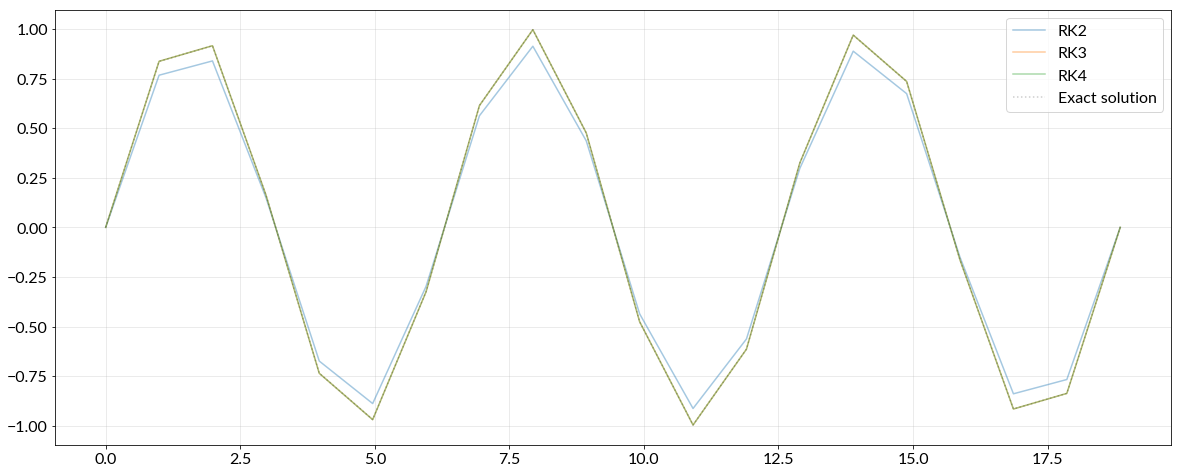

In [245]:
for order, method in rk_methods.items():
    plt.plot(x, method(f, x, 0), alpha=0.4, label=f'RK{order}')
    
plt.plot(x, np.sin(x), 'k:', alpha=0.2, label='Exact solution')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### Order of RK methods

In [264]:
hs = np.logspace(-3, 0, num=20)

In [262]:
errors = {order: [] for order in TABLEAUS.keys()}
errors

{2: [], 3: [], 4: []}